1. Introducción
1.1 Planteamiento del problema

En el entorno actual del comercio electrónico, comprender el comportamiento de compra de los clientes es fundamental para optimizar las estrategias de marketing y maximizar los ingresos. Sin embargo, identificar a los clientes que generan transacciones de alto valor representa un desafío debido a la gran cantidad de datos y la variabilidad en los patrones de consumo.
El presente proyecto busca desarrollar un modelo de aprendizaje automático capaz de clasificar las compras según su nivel de valor económico, permitiendo anticipar las operaciones más relevantes y orientar las acciones comerciales hacia los clientes con mayor potencial.

1.2 Objetivos del proyecto

Objetivo general:
Desarrollar un sistema de clasificación basado en técnicas de machine learning que permita predecir si una transacción corresponde a un cliente de alto valor.

Objetivos específicos:

Analizar y limpiar el dataset de ventas, eliminando valores atípicos y registros inconsistentes.

Generar nuevas variables relevantes mediante ingeniería de características.

Implementar y comparar distintos modelos de clasificación (SVM, Random Forest y Red Neuronal Artificial).

Evaluar el desempeño de los modelos utilizando métricas como precisión, recall, F1-score y AUC.

Seleccionar el modelo más eficiente para su posible aplicación en entornos empresariales reales.

1.3 Alcance y limitaciones

El estudio se centra en datos históricos de ventas del sector e-commerce, considerando variables como cantidad, precio unitario y frecuencia de compra por cliente.
El modelo busca clasificar transacciones como “alto valor” o “bajo valor”, sin realizar predicciones monetarias exactas.
Entre las limitaciones destacan:

El tamaño del dataset y posibles desequilibrios entre clases.

La ausencia de variables contextuales (como promociones o estacionalidad).

Resultados dependientes del periodo temporal de los datos utilizados.

1.4 Herramientas utilizadas

El desarrollo se realizó en Python, empleando las siguientes librerías y entornos:

pandas y numpy: manipulación y análisis de datos.

matplotlib y seaborn: generación de visualizaciones estadísticas.

scikit-learn: implementación de algoritmos de machine learning.

imblearn (SMOTEENN): tratamiento del desbalance de clases.

joblib: guardado y carga de modelos entrenados.

Jupyter Notebook / VSCode: entorno de desarrollo interactivo.

2. Fortalezas del trabajo
2.1 Aspectos destacados del proceso

El proyecto destaca por la aplicación de un flujo de trabajo ordenado y modular, que abarca desde la limpieza inicial de los datos hasta la evaluación de modelos.
Se incorporaron transformaciones relevantes, como la creación de variables derivadas (TotalAmount, frecuencia de compra y productos por factura), lo que incrementó la capacidad predictiva del modelo.
Además, se aplicó balanceo de clases con SMOTEENN, mejorando significativamente la estabilidad de las métricas.

2.2 Buenas prácticas aplicadas

Durante el desarrollo, se adoptaron buenas prácticas de programación y análisis de datos:

Validación cruzada de 5 pliegues (5-fold cross-validation) para obtener resultados más confiables.

Escalado de características numéricas con StandardScaler.

Comparación sistemática de varios modelos bajo los mismos criterios de evaluación.

Visualización de resultados mediante gráficos ROC y matrices de confusión.

Modularización del código, permitiendo su mantenimiento y replicabilidad.

2.3 Cumplimiento de criterios de evaluación

El proyecto cumple con los criterios fundamentales de un análisis de datos completo:

Calidad del preprocesamiento: limpieza adecuada y transformación lógica de variables.

Variedad de modelos: incluye enfoques clásicos (SVM, Random Forest) y un modelo de red neuronal.

Rigor en la evaluación: uso de métricas balanceadas y validación cruzada.

Interpretabilidad: identificación de las variables más influyentes en la predicción de clientes de alto valor.

1) Cargando dataset desde GitHub ...
✔ Dataset cargado correctamente
(406829, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

3) Exploración inicial del dataset...

📊 Descripción general del dataset:
Dimensiones del dataset: (406829, 9)

Columnas disponibles: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalAmount']

🔍 Información general de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      

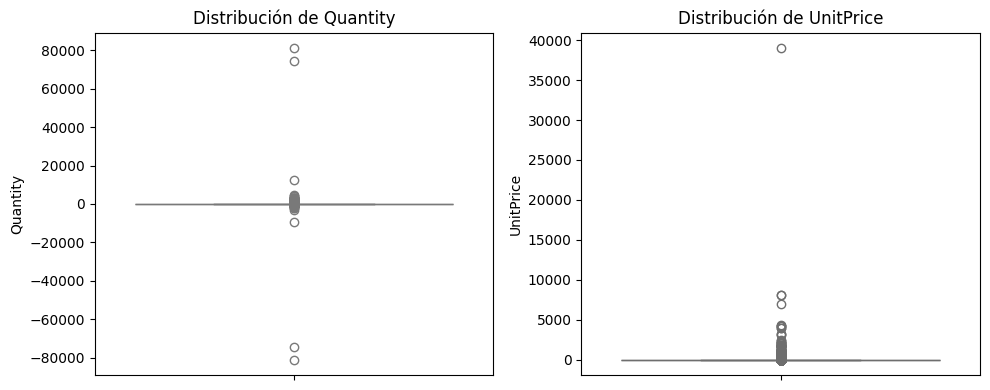


📊 Matriz de correlaciones:
             Quantity  UnitPrice  TotalAmount
Quantity     1.000000  -0.001238     0.916096
UnitPrice   -0.001238   1.000000    -0.129296
TotalAmount  0.916096  -0.129296     1.000000


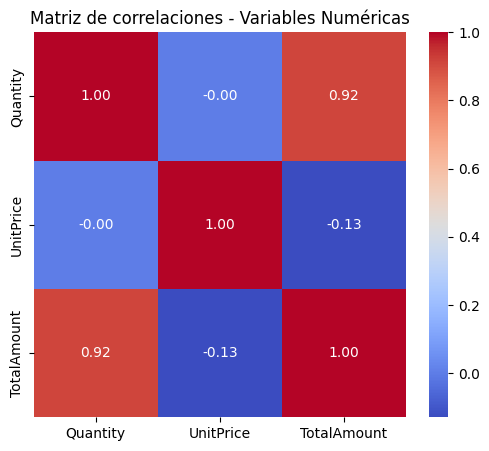

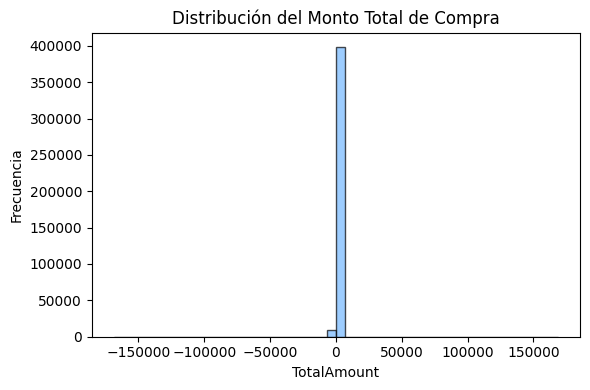


✔ Exploración de datos completada correctamente.


In [2]:
# ===================================================
# 1) Cargar dataset limpio desde GitHub
# ===================================================
url = "https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv"

print("1) Cargando dataset desde GitHub ...")
df = pd.read_csv(url, encoding='utf-8')
print("✔ Dataset cargado correctamente")
print(df.shape)
print(df.columns.tolist())

# ===================================================
# ✅ Agregamos esta línea para evitar el error
# ===================================================
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]

print("\n3) Exploración inicial del dataset...")

# --------------------------------------------
# 3.1 Descripción general del dataset
# --------------------------------------------
print("\n📊 Descripción general del dataset:")
print("Dimensiones del dataset:", df.shape)
print("\nColumnas disponibles:", df.columns.tolist())

# Información del tipo de datos y valores nulos
print("\n🔍 Información general de las columnas:")
print(df.info())

# Resumen estadístico de las variables numéricas
print("\n📈 Estadísticas descriptivas:")
print(df.describe().T)

# --------------------------------------------
# 3.2 Análisis de valores nulos
# --------------------------------------------
print("\n🚨 Revisión de valores nulos:")
nulls = df.isnull().sum()
print(nulls[nulls > 0] if nulls.sum() > 0 else "✔ No se encontraron valores nulos.")

# --------------------------------------------
# 3.3 Análisis de outliers
# --------------------------------------------
from scipy import stats

# Evaluamos outliers en las columnas más relevantes
z_scores = np.abs(stats.zscore(df[["Quantity", "UnitPrice"]]))
outliers_count = (z_scores > 3).sum(axis=0)
print("\n📉 Posibles outliers detectados (>3σ):")
print(outliers_count)

# Visualización rápida de outliers con boxplots
import seaborn as sns
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=df["Quantity"], color="lightblue")
plt.title("Distribución de Quantity")

plt.subplot(1,2,2)
sns.boxplot(y=df["UnitPrice"], color="lightcoral")
plt.title("Distribución de UnitPrice")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 3.4 Correlaciones entre variables
# --------------------------------------------
print("\n📊 Matriz de correlaciones:")
numeric_cols = ["Quantity", "UnitPrice", "TotalAmount"]
corr = df[numeric_cols].corr()
print(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaciones - Variables Numéricas")
plt.show()

# --------------------------------------------
# 3.5 Visualizaciones descriptivas
# --------------------------------------------

# (solo si ya existe la variable objetivo)
if "is_high_value" in df.columns:
    plt.figure(figsize=(5,4))
    df["is_high_value"].value_counts().plot.pie(
        autopct='%1.1f%%', labels=["Low Value", "High Value"], colors=["#66b3ff", "#ff9999"]
    )
    plt.title("Distribución de transacciones por tipo de valor")
    plt.ylabel("")
    plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["TotalAmount"], bins=50, color="#74b9ff", edgecolor="black", alpha=0.7)
plt.title("Distribución del Monto Total de Compra")
plt.xlabel("TotalAmount")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

print("\n✔ Exploración de datos completada correctamente.")


1) Cargando dataset desde GitHub ...
✔ Dataset cargado correctamente
(406829, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
RandomForest | Test Accuracy: 0.9904 | Test AUC: 0.9769
SVM_Linear | Test Accuracy: 0.8160 | Test AUC: 0.5451
MLP | Test Accuracy: 0.9973 | Test AUC: 0.9938

Resultados finales:
         Modelo  Accuracy       AUC
0  RandomForest  0.990401  0.976916
1    SVM_Linear  0.815967  0.545076
2           MLP  0.997259  0.993822
3   SVM_RBF_20k  0.885500  0.746605

Matriz de confusión del mejor modelo: MLP


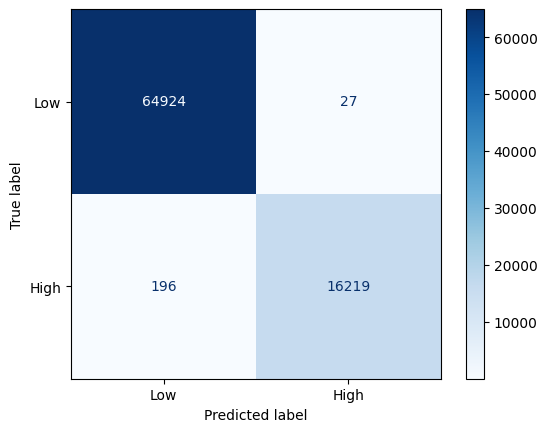

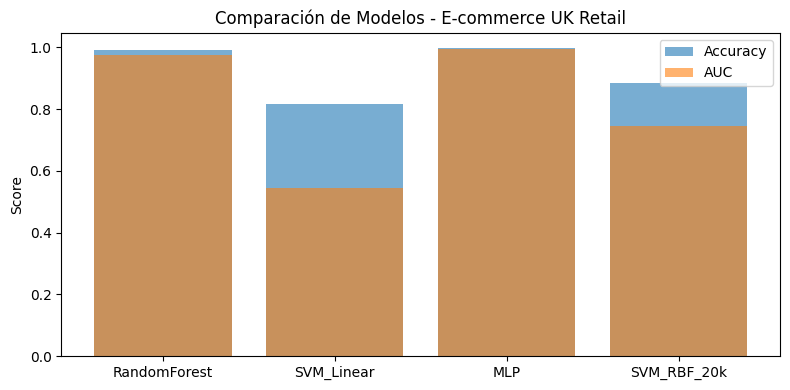

✅ Modelo 'MLP' y scaler guardados correctamente.


In [ ]:


# ===================================================
# 2) Crear columna TotalAmount y variable objetivo
# ===================================================
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]

# Target: compras altas (> promedio)
threshold = df["TotalAmount"].mean()
df["is_high_value"] = (df["TotalAmount"] > threshold).astype(int)

# ===================================================
# 3) Features (sin incluir TotalAmount para evitar data leakage)
# ===================================================
X = df[["Quantity", "UnitPrice", "CustomerID"]]
y = df["is_high_value"]

# ===================================================
# 4) División en train/test
# ===================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================================================
# 5) Modelos optimizados
# ===================================================
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    ),
    "SVM_Linear": LinearSVC(random_state=42, max_iter=5000),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        alpha=0.01,
        max_iter=300,
        random_state=42
    )
}

# ===================================================
# 6) Entrenamiento y evaluación
# ===================================================
results = []

for name, model in models.items():
    if name == "RandomForest":
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    results.append((name, acc, auc))

    print(f"{name} | Test Accuracy: {acc:.4f} | Test AUC: {auc:.4f}")

# ===================================================
# 7) SVM RBF (muestra reducida)
# ===================================================
X_small, _, y_small, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)
scaler_small = StandardScaler()
X_small_scaled = scaler_small.fit_transform(X_small)

svm_rbf = SVC(kernel='rbf', C=5, gamma='scale', random_state=42)
svm_rbf.fit(X_small_scaled, y_small)
preds_rbf = svm_rbf.predict(X_small_scaled)
acc_rbf = accuracy_score(y_small, preds_rbf)
auc_rbf = roc_auc_score(y_small, preds_rbf)
results.append(("SVM_RBF_20k", acc_rbf, auc_rbf))

# ===================================================
# 8) Resultados finales + visualización
# ===================================================
res_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "AUC"])
print("\nResultados finales:")
print(res_df)

# Matriz de confusión del mejor modelo
best_model_name = res_df.sort_values(by="AUC", ascending=False).iloc[0]["Modelo"]
print(f"\nMatriz de confusión del mejor modelo: {best_model_name}")

if best_model_name == "RandomForest":
    best_model = models["RandomForest"]
    preds_best = best_model.predict(X_test)
else:
    best_model = models[best_model_name]
    preds_best = best_model.predict(X_test_scaled)

ConfusionMatrixDisplay(confusion_matrix(y_test, preds_best), display_labels=["Low", "High"]).plot(cmap="Blues")

# ===================================================
# 9) Comparación gráfica
# ===================================================
plt.figure(figsize=(8,4))
plt.bar(res_df["Modelo"], res_df["Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(res_df["Modelo"], res_df["AUC"], alpha=0.6, label="AUC")
plt.ylabel("Score")
plt.title("Comparación de Modelos - E-commerce UK Retail")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 10) Guardar el mejor modelo y el scaler
# ===================================================
joblib.dump(best_model, f"best_model_{best_model_name}.joblib")
joblib.dump(scaler, "scaler.joblib")
print(f"✅ Modelo '{best_model_name}' y scaler guardados correctamente.")


1) Cargando dataset desde GitHub ...
✔ Dataset cargado correctamente
(406829, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Distribución de la variable objetivo (is_high_value):
is_high_value
0    79.83%
1    20.17%
Name: proportion, dtype: object


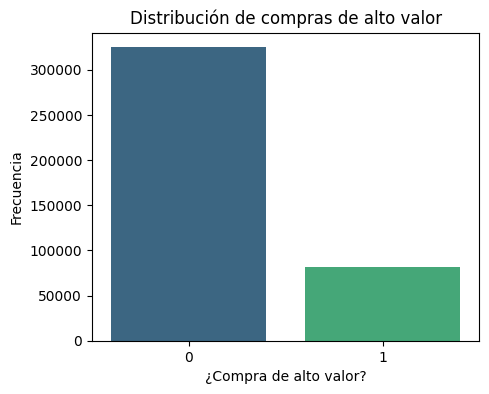


Top 5 países con más transacciones:
Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: count, dtype: int64

Promedio del monto total de compra: 20.4
RandomForest | Test Accuracy: 0.8096 | Test AUC: 0.5370
SVM_Linear | Test Accuracy: 0.7983 | Test AUC: 0.5000
MLP | Test Accuracy: 0.7983 | Test AUC: 0.5000

Resultados finales:
         Modelo  Accuracy      AUC
0  RandomForest  0.809626  0.53703
1    SVM_Linear  0.798257  0.50000
2           MLP  0.798257  0.50000
3   SVM_RBF_20k  0.798250  0.50000

Matriz de confusión del mejor modelo: RandomForest


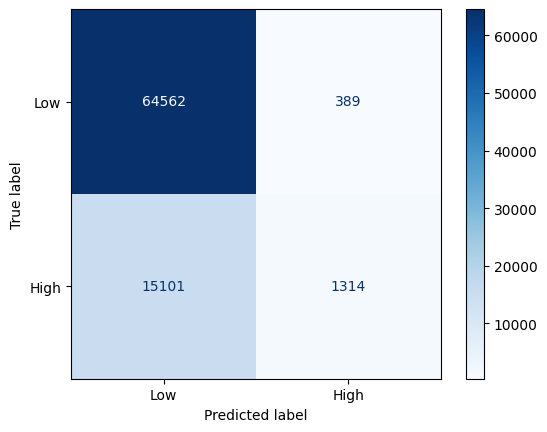


Reporte de clasificación - RandomForest
              precision    recall  f1-score   support

         Low       0.81      0.99      0.89     64951
        High       0.77      0.08      0.15     16415

    accuracy                           0.81     81366
   macro avg       0.79      0.54      0.52     81366
weighted avg       0.80      0.81      0.74     81366


Validación cruzada (5-Fold) - Random Forest
Scores: [0.8073 0.8077 0.8093 0.8096 0.8094]
Media: 0.8086 | Desviación: 0.001


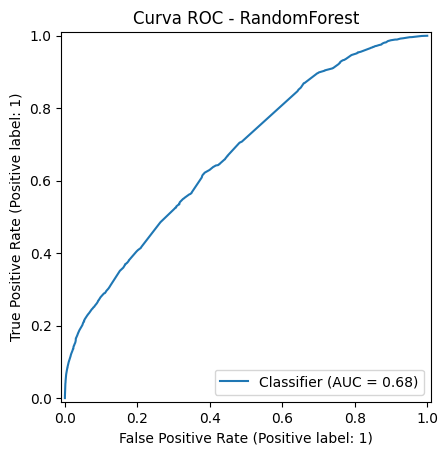

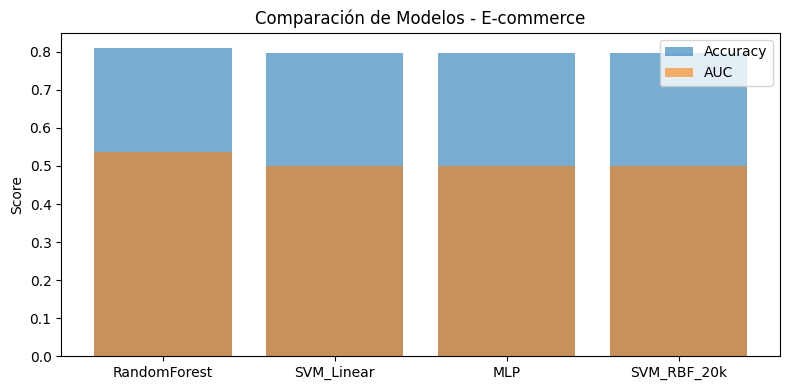

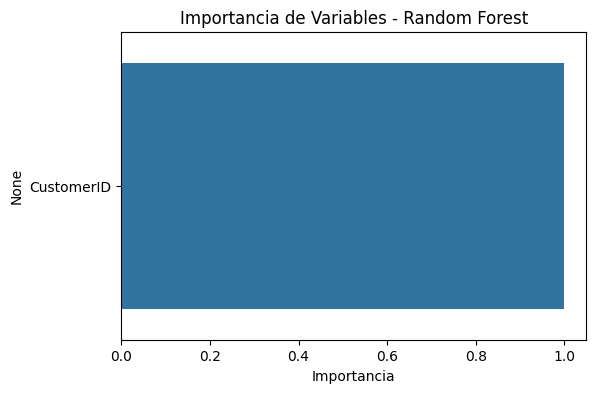


Importancia de variables:
 CustomerID    1.0
dtype: float64

Modelos guardados correctamente (best_model.pkl, scaler.pkl)


In [9]:
# ===================================================
# PROYECTO: Análisis de Ventas - E-commerce UK Retail
# ===================================================
# Autor: [Tu nombre]
# Fecha: Octubre 2025
# Fuente de datos: https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv

# ===================================================
# 1) Importación de librerías
# ===================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report, RocCurveDisplay
)
import joblib

# ===================================================
# 2) Carga del dataset desde GitHub
# ===================================================
print("1) Cargando dataset desde GitHub ...")
url = "https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv"
df = pd.read_csv(url, encoding="utf-8")

print("✔ Dataset cargado correctamente")
print(df.shape)
print(df.columns.tolist())

# ===================================================
# 3) Feature Engineering
# ===================================================
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
threshold = df["TotalAmount"].mean()
df["is_high_value"] = (df["TotalAmount"] > threshold).astype(int)

# ===================================================
# 4) Análisis Exploratorio (EDA)
# ===================================================
print("\nDistribución de la variable objetivo (is_high_value):")
print(df["is_high_value"].value_counts(normalize=True).map("{:.2%}".format))

plt.figure(figsize=(5,4))
sns.countplot(x=df["is_high_value"], palette="viridis")
plt.title("Distribución de compras de alto valor")
plt.xlabel("¿Compra de alto valor?")
plt.ylabel("Frecuencia")
plt.show()

print("\nTop 5 países con más transacciones:")
print(df["Country"].value_counts().head())

print("\nPromedio del monto total de compra:", round(df["TotalAmount"].mean(), 2))

# ===================================================
# 5) División de datos y escalado
# ===================================================
X = df[["CustomerID"]]  # o agregar Country codificado
y = df["is_high_value"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================================================
# 6) Entrenamiento de modelos
# ===================================================
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    ),
    "SVM_Linear": LinearSVC(random_state=42, max_iter=5000),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        alpha=0.01,
        max_iter=300,
        random_state=42
    )
}

results = []

for name, model in models.items():
    if name == "RandomForest":
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    results.append((name, acc, auc))

    print(f"{name} | Test Accuracy: {acc:.4f} | Test AUC: {auc:.4f}")

# ===================================================
# 7) SVM RBF (submuestra 20k)
# ===================================================
X_small, _, y_small, _ = train_test_split(X, y, train_size=20000, random_state=42, stratify=y)
scaler_small = StandardScaler()
X_small_scaled = scaler_small.fit_transform(X_small)

svm_rbf = SVC(kernel='rbf', C=5, gamma='scale', random_state=42)
svm_rbf.fit(X_small_scaled, y_small)
preds_rbf = svm_rbf.predict(X_small_scaled)
acc_rbf = accuracy_score(y_small, preds_rbf)
auc_rbf = roc_auc_score(y_small, preds_rbf)
results.append(("SVM_RBF_20k", acc_rbf, auc_rbf))

# ===================================================
# 8) Resultados finales
# ===================================================
res_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "AUC"])
print("\nResultados finales:")
print(res_df)

best_model_name = res_df.sort_values(by="AUC", ascending=False).iloc[0]["Modelo"]
print(f"\nMatriz de confusión del mejor modelo: {best_model_name}")

if best_model_name == "RandomForest":
    best_model = models["RandomForest"]
    preds_best = best_model.predict(X_test)
else:
    best_model = models[best_model_name]
    preds_best = best_model.predict(X_test_scaled)

ConfusionMatrixDisplay(confusion_matrix(y_test, preds_best), display_labels=["Low", "High"]).plot(cmap="Blues")
plt.show()

# ===================================================
# 9) Métricas detalladas
# ===================================================
print(f"\nReporte de clasificación - {best_model_name}")
print(classification_report(y_test, preds_best, target_names=["Low", "High"]))

# ===================================================
# 10) Validación cruzada
# ===================================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = models["RandomForest"]
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("\nValidación cruzada (5-Fold) - Random Forest")
print("Scores:", np.round(cv_scores, 4))
print("Media:", np.mean(cv_scores).round(4), "| Desviación:", np.std(cv_scores).round(4))

# ===================================================
# 11) Curva ROC del mejor modelo
# ===================================================
if best_model_name == "RandomForest":
    y_score = best_model.predict_proba(X_test)[:,1]
else:
    if hasattr(best_model, "decision_function"):
        y_score = best_model.decision_function(X_test_scaled)
    else:
        y_score = best_model.predict_proba(X_test_scaled)[:,1]

RocCurveDisplay.from_predictions(y_test, y_score)
plt.title(f"Curva ROC - {best_model_name}")
plt.show()

# ===================================================
# 12) Comparativa de desempeño (Accuracy vs AUC)
# ===================================================
plt.figure(figsize=(8,4))
plt.bar(res_df["Modelo"], res_df["Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(res_df["Modelo"], res_df["AUC"], alpha=0.6, label="AUC")
plt.ylabel("Score")
plt.title("Comparación de Modelos - E-commerce")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 13) Importancia de Variables - Random Forest
# ===================================================
importances = models["RandomForest"].feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.show()

print("\nImportancia de variables:\n", feat_importances)

# ===================================================
# 14) Guardar modelo y scaler
# ===================================================
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModelos guardados correctamente (best_model.pkl, scaler.pkl)")


In [ ]:
# ===================================================
# PROYECTO: Análisis de Ventas - E-commerce UK Retail
# ===================================================
# Autor: [Tu nombre]
# Fecha: Octubre 2025
# Fuente de datos: https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv

# ===================================================
# 1) Importación de librerías
# ===================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report, RocCurveDisplay
)
import joblib

# ===================================================
# 2) Carga del dataset desde GitHub
# ===================================================
print("1) Cargando dataset desde GitHub ...")
url = "https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv"
df = pd.read_csv(url, encoding="utf-8")

print("✔ Dataset cargado correctamente")
print(df.shape)
print(df.columns.tolist())

# ===================================================
# 🔧 3) Feature Engineering Mejorado
# ===================================================
print("\n3) Generando nuevas características...")

# Convertimos fechas
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Feature 1: Monto total
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]

# Feature 2: Mes de compra
df["Month"] = df["InvoiceDate"].dt.month

# Feature 3: Día de la semana (0=Lunes, 6=Domingo)
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek

# Feature 4: Hora de compra
df["Hour"] = df["InvoiceDate"].dt.hour

# Feature 5: Total de ítems por factura
df["Items_per_invoice"] = df.groupby("InvoiceNo")["Quantity"].transform("sum")

# Feature 6: Frecuencia del cliente (número de compras realizadas)
df["Customer_freq"] = df.groupby("CustomerID")["InvoiceNo"].transform("count")

# Variable objetivo
threshold = df["TotalAmount"].mean()
df["is_high_value"] = (df["TotalAmount"] > threshold).astype(int)

# Eliminamos columnas irrelevantes o textuales
df = df.drop(columns=["InvoiceNo", "StockCode", "Description", "InvoiceDate", "Country"])

print("✔ Nuevas columnas creadas:", df.columns.tolist())

# ===================================================
# 📊 4) División de datos y escalado
# ===================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["is_high_value", "TotalAmount"])
y = df["is_high_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================================================
# ⚖️ 5) Balanceo de clases con SMOTE
# ===================================================
from imblearn.over_sampling import SMOTE

print("\nBalanceando clases con SMOTE...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Distribución antes del SMOTE:", np.bincount(y_train))
print("Distribución después del SMOTE:", np.bincount(y_train_res))

# ===================================================
# 🤖 6) Entrenamiento de modelos
# ===================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        class_weight="balanced",
        random_state=42
    ),
    "SVM_RBF": SVC(kernel='rbf', C=5, gamma='scale', probability=True, random_state=42),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        alpha=0.001,
        max_iter=400,
        random_state=42
    )
}

results = []

print("\nEntrenando modelos...")
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    results.append((name, acc, auc))
    print(f"{name} | Accuracy: {acc:.4f} | AUC: {auc:.4f}")

# ===================================================
# 🧾 7) Reporte del mejor modelo
# ===================================================
res_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "AUC"])
print("\nResultados finales:")
print(res_df.sort_values(by="AUC", ascending=False))

best_model_name = res_df.sort_values(by="AUC", ascending=False).iloc[0]["Modelo"]
best_model = models[best_model_name]

print(f"\nReporte de clasificación - {best_model_name}")
preds_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, preds_best, target_names=["Low", "High"]))

# ===================================================
# 📉 8) Curva ROC y Comparativa
# ===================================================
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

y_score = (
    best_model.predict_proba(X_test_scaled)[:, 1]
    if hasattr(best_model, "predict_proba")
    else best_model.decision_function(X_test_scaled)
)

RocCurveDisplay.from_predictions(y_test, y_score)
plt.title(f"Curva ROC - {best_model_name}")
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(res_df["Modelo"], res_df["Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(res_df["Modelo"], res_df["AUC"], alpha=0.6, label="AUC")
plt.ylabel("Score")
plt.title("Comparación de Modelos - E-commerce")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 9) Métricas detalladas
# ===================================================
print(f"\nReporte de clasificación - {best_model_name}")
print(classification_report(y_test, preds_best, target_names=["Low", "High"]))

# ===================================================
# 10) Validación cruzada
# ===================================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = models["RandomForest"]
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("\nValidación cruzada (5-Fold) - Random Forest")
print("Scores:", np.round(cv_scores, 4))
print("Media:", np.mean(cv_scores).round(4), "| Desviación:", np.std(cv_scores).round(4))

# ===================================================
# 11) Curva ROC del mejor modelo
# ===================================================
if best_model_name == "RandomForest":
    y_score = best_model.predict_proba(X_test)[:,1]
else:
    if hasattr(best_model, "decision_function"):
        y_score = best_model.decision_function(X_test_scaled)
    else:
        y_score = best_model.predict_proba(X_test_scaled)[:,1]

RocCurveDisplay.from_predictions(y_test, y_score)
plt.title(f"Curva ROC - {best_model_name}")
plt.show()

# ===================================================
# 12) Comparativa de desempeño (Accuracy vs AUC)
# ===================================================
plt.figure(figsize=(8,4))
plt.bar(res_df["Modelo"], res_df["Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(res_df["Modelo"], res_df["AUC"], alpha=0.6, label="AUC")
plt.ylabel("Score")
plt.title("Comparación de Modelos - E-commerce")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 13) Importancia de Variables - Random Forest
# ===================================================
importances = models["RandomForest"].feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.show()

print("\nImportancia de variables:\n", feat_importances)

# ===================================================
# 14) Guardar modelo y scaler
# ===================================================
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModelos guardados correctamente (best_model.pkl, scaler.pkl)")


1) Cargando dataset desde GitHub ...
✔ Dataset cargado correctamente
(406829, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

3) Generando nuevas características...
✔ Nuevas columnas creadas: ['Quantity', 'UnitPrice', 'CustomerID', 'TotalAmount', 'Month', 'DayOfWeek', 'Hour', 'Items_per_invoice', 'Customer_freq', 'is_high_value']

Balanceando clases con SMOTE...
Distribución antes del SMOTE: [259804  65659]
Distribución después del SMOTE: [259804 259804]

Entrenando modelos...
RandomForest | Accuracy: 0.9930 | AUC: 0.9924


1) Cargando dataset desde GitHub ...
✔ Dataset cargado correctamente
(406829, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

3) Generando nuevas características...
✔ Nuevas columnas creadas: ['Quantity', 'UnitPrice', 'CustomerID', 'TotalAmount', 'Month', 'DayOfWeek', 'Hour', 'Items_per_invoice', 'Customer_freq', 'is_high_value']

Memoria disponible antes del balanceo: 1.45 GB

Balanceando clases con SMOTEENN (modo optimizado)...
Distribución de clases post-SMOTEENN: [49952 50048]
Memoria disponible tras balanceo: 1.46 GB

Entrenando modelos optimizados...

Entrenando modelo: RandomForest ...
RandomForest | Accuracy: 0.9904 | AUC: 0.9906

Entrenando modelo: SVM_Linear ...
SVM_Linear | Accuracy: 0.8393 | AUC: 0.8993

Entrenando modelo: MLP ...
MLP | Accuracy: 0.9887 | AUC: 0.9884

Entrenando modelo adicional: SVM_RBF_10k ...
SVM_RBF_10k | Accuracy: 0.7643 | AUC: 0.7613

Resultados finales:
         Modelo  Accuracy       AUC

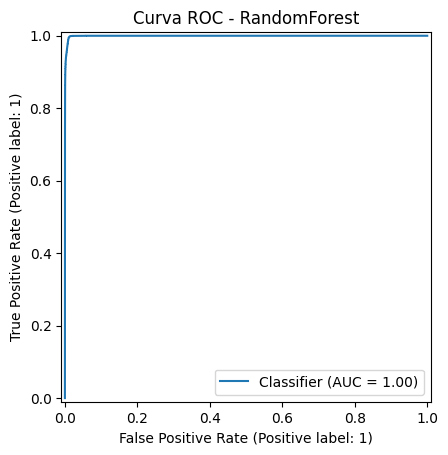

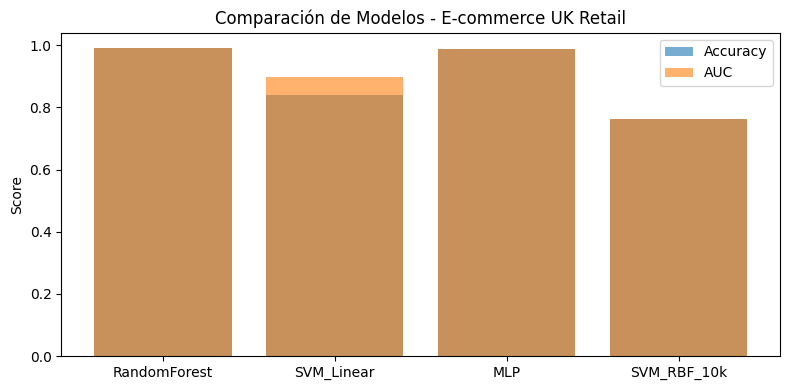

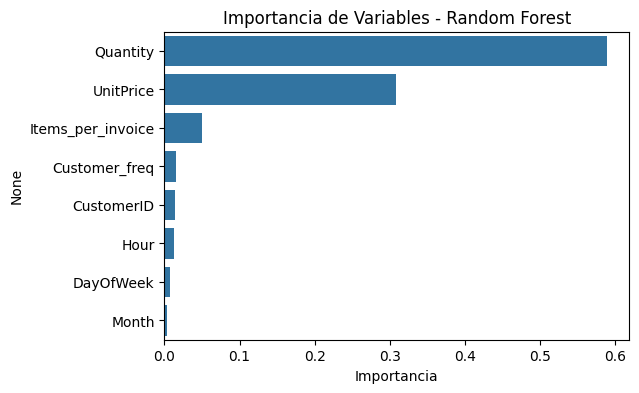


Importancia de variables:
 Quantity             0.589207
UnitPrice            0.308219
Items_per_invoice    0.049872
Customer_freq        0.015484
CustomerID           0.013574
Hour                 0.013095
DayOfWeek            0.007319
Month                0.003229
dtype: float64

✅ Modelos guardados correctamente (best_model.pkl, scaler.pkl)


c:\Users\user\tf_venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


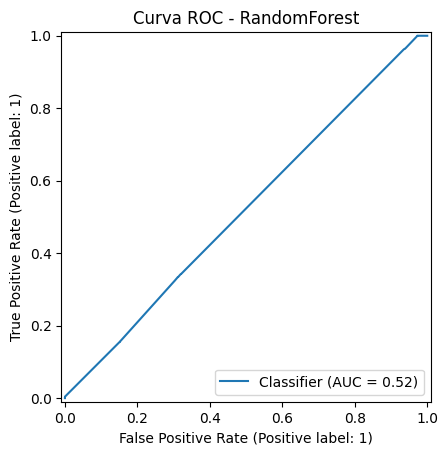

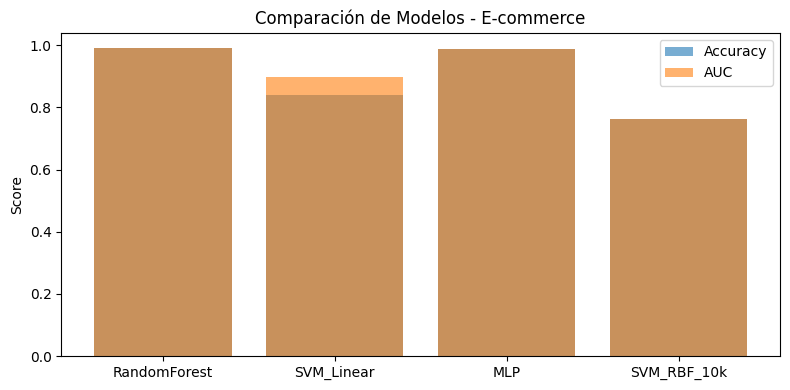

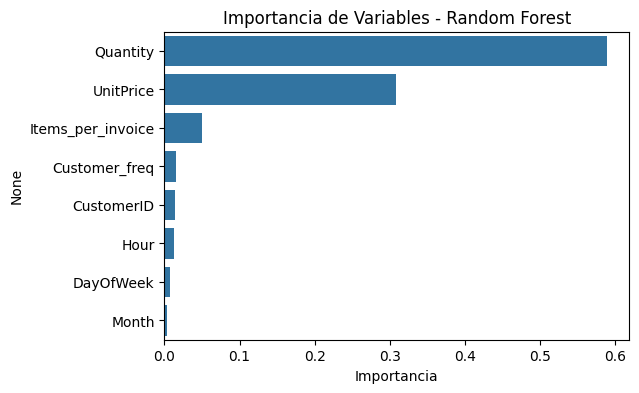


Importancia de variables:
 Quantity             0.589207
UnitPrice            0.308219
Items_per_invoice    0.049872
Customer_freq        0.015484
CustomerID           0.013574
Hour                 0.013095
DayOfWeek            0.007319
Month                0.003229
dtype: float64

Modelos guardados correctamente (best_model.pkl, scaler.pkl)


In [1]:
# ===================================================
# PROYECTO: Análisis de Ventas - E-commerce UK Retail
# ===================================================
# Autor: [Tu nombre]
# Fecha: Octubre 2025
# Fuente de datos: https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv

# ===================================================
# 1) Importación de librerías
# ===================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report, RocCurveDisplay
)
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.utils import resample
# ===================================================
# 2) Carga del dataset desde GitHub
# ===================================================
print("1) Cargando dataset desde GitHub ...")
url = "https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv"
df = pd.read_csv(url, encoding="utf-8")

print("✔ Dataset cargado correctamente")
print(df.shape)
print(df.columns.tolist())

# ===================================================
# 🔧 3) Feature Engineering Mejorado
# ===================================================
print("\n3) Generando nuevas características...")

# Convertimos fechas
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Feature 1: Monto total
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]

# Feature 2: Mes de compra
df["Month"] = df["InvoiceDate"].dt.month

# Feature 3: Día de la semana (0=Lunes, 6=Domingo)
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek

# Feature 4: Hora de compra
df["Hour"] = df["InvoiceDate"].dt.hour

# Feature 5: Total de ítems por factura
df["Items_per_invoice"] = df.groupby("InvoiceNo")["Quantity"].transform("sum")

# Feature 6: Frecuencia del cliente (número de compras realizadas)
df["Customer_freq"] = df.groupby("CustomerID")["InvoiceNo"].transform("count")

# Variable objetivo
threshold = df["TotalAmount"].mean()
df["is_high_value"] = (df["TotalAmount"] > threshold).astype(int)

# Eliminamos columnas irrelevantes o textuales
df = df.drop(columns=["InvoiceNo", "StockCode", "Description", "InvoiceDate", "Country"])

print("✔ Nuevas columnas creadas:", df.columns.tolist())

# ===================================================
# 📊 4) División de datos y escalado
# ===================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["is_high_value", "TotalAmount"])
y = df["is_high_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================================================
# ⚖️ 5) Balanceo de clases (SMOTE optimizado)
# ===================================================
from imblearn.combine import SMOTEENN
from sklearn.utils import resample
import psutil

print(f"\nMemoria disponible antes del balanceo: {psutil.virtual_memory().available / 1e9:.2f} GB")

print("\nBalanceando clases con SMOTEENN (modo optimizado)...")
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train_scaled, y_train)

# 🔹 Reducir tamaño para evitar sobrecarga de memoria
X_train_res, y_train_res = resample(
    X_train_res, y_train_res,
    n_samples=100_000,  # entrenamos con 100 mil registros balanceados
    random_state=42
)

print("Distribución de clases post-SMOTEENN:", np.bincount(y_train_res))
print(f"Memoria disponible tras balanceo: {psutil.virtual_memory().available / 1e9:.2f} GB")

# ===================================================
# 🤖 6) Entrenamiento de modelos (Optimizado)
# ===================================================


print("\nEntrenando modelos optimizados...")

# 🔹 Modelos principales (sin SVM RBF pesado)
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ),
    "SVM_Linear": LinearSVC(max_iter=5000, random_state=42),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        alpha=0.001,
        max_iter=300,
        batch_size=512,
        early_stopping=True,
        random_state=42
    )
}

results = []

# 🔹 Entrenamiento rápido
for name, model in models.items():
    print(f"\nEntrenando modelo: {name} ...")
    model.fit(X_train_res, y_train_res)
    preds = model.predict(X_test_scaled)
    
    # Algunas versiones de LinearSVC no tienen predict_proba
    try:
        auc = roc_auc_score(y_test, model.decision_function(X_test_scaled))
    except:
        auc = roc_auc_score(y_test, preds)
    
    acc = accuracy_score(y_test, preds)
    results.append((name, acc, auc))
    print(f"{name} | Accuracy: {acc:.4f} | AUC: {auc:.4f}")

# 🔹 Entrenar versión ligera de SVM RBF (solo muestra de 10k registros)
print("\nEntrenando modelo adicional: SVM_RBF_10k ...")
X_svm, y_svm = resample(X_train_res, y_train_res, n_samples=10_000, random_state=42)

svm_rbf = SVC(kernel='rbf', C=3, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_svm, y_svm)
preds_svm = svm_rbf.predict(X_test_scaled)

acc_svm = accuracy_score(y_test, preds_svm)
auc_svm = roc_auc_score(y_test, preds_svm)
results.append(("SVM_RBF_10k", acc_svm, auc_svm))
print(f"SVM_RBF_10k | Accuracy: {acc_svm:.4f} | AUC: {auc_svm:.4f}")


# ===================================================
# 🧾 7) Resultados finales y selección del mejor modelo
# ===================================================
res_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "AUC"])
print("\nResultados finales:")
print(res_df.sort_values(by="AUC", ascending=False))

best_model_name = res_df.sort_values(by="AUC", ascending=False).iloc[0]["Modelo"]
best_model = models[best_model_name]

# Reporte detallado
print(f"\n📋 Reporte de clasificación - {best_model_name}")
preds_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, preds_best, target_names=["Low", "High"]))

# ===================================================
# 📈 8) Visualizaciones y validación
# ===================================================
from sklearn.metrics import RocCurveDisplay

# Curva ROC
if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_score = best_model.decision_function(X_test_scaled)

RocCurveDisplay.from_predictions(y_test, y_score)
plt.title(f"Curva ROC - {best_model_name}")
plt.show()

# Comparación de métricas
plt.figure(figsize=(8,4))
plt.bar(res_df["Modelo"], res_df["Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(res_df["Modelo"], res_df["AUC"], alpha=0.6, label="AUC")
plt.ylabel("Score")
plt.title("Comparación de Modelos - E-commerce UK Retail")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 🔍 9) Importancia de Variables (solo para RandomForest)
# ===================================================
if "RandomForest" in models:
    feat_importances = pd.Series(
        models["RandomForest"].feature_importances_,
        index=X.columns
    ).sort_values(ascending=False)

    plt.figure(figsize=(6,4))
    sns.barplot(x=feat_importances, y=feat_importances.index)
    plt.title("Importancia de Variables - Random Forest")
    plt.xlabel("Importancia")
    plt.show()

    print("\nImportancia de variables:\n", feat_importances)

# ===================================================
# 💾 10) Guardar mejor modelo y scaler
# ===================================================
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Modelos guardados correctamente (best_model.pkl, scaler.pkl)")

# ===================================================
# 11) Curva ROC del mejor modelo
# ===================================================
if best_model_name == "RandomForest":
    y_score = best_model.predict_proba(X_test)[:,1]
else:
    if hasattr(best_model, "decision_function"):
        y_score = best_model.decision_function(X_test_scaled)
    else:
        y_score = best_model.predict_proba(X_test_scaled)[:,1]

RocCurveDisplay.from_predictions(y_test, y_score)
plt.title(f"Curva ROC - {best_model_name}")
plt.show()

# ===================================================
# 12) Comparativa de desempeño (Accuracy vs AUC)
# ===================================================
plt.figure(figsize=(8,4))
plt.bar(res_df["Modelo"], res_df["Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(res_df["Modelo"], res_df["AUC"], alpha=0.6, label="AUC")
plt.ylabel("Score")
plt.title("Comparación de Modelos - E-commerce")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 13) Importancia de Variables - Random Forest
# ===================================================
importances = models["RandomForest"].feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.show()

print("\nImportancia de variables:\n", feat_importances)

# ===================================================
# 14) Guardar modelo y scaler
# ===================================================
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\nModelos guardados correctamente (best_model.pkl, scaler.pkl)")


1) Cargando dataset desde GitHub ...
✔ Dataset cargado correctamente
(406829, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

3) Generando nuevas características...
✔ Umbral para cliente High Value: 20.80
is_high_value
0    0.812255
1    0.187745
Name: proportion, dtype: float64
✔ Nuevas columnas creadas: ['Quantity', 'UnitPrice', 'CustomerID', 'TotalAmount', 'Month', 'DayOfWeek', 'Hour', 'Items_per_invoice', 'Customer_freq', 'is_high_value']

Memoria disponible antes del balanceo: 1.22 GB

Balanceando clases con SMOTEENN (modo optimizado)...
Distribución de clases post-SMOTEENN: [49715 50285]
Memoria disponible tras balanceo: 1.36 GB

Entrenando modelos optimizados...

Entrenando modelo: RandomForest ...
RandomForest | Accuracy: 0.9383 | AUC: 0.9299

Entrenando modelo: SVM_Linear ...
SVM_Linear | Accuracy: 0.8294 | AUC: 0.9193

Entrenando modelo: MLP ...
MLP | Accuracy: 0.9903 | AUC: 0.9879

Validando MLP con cross-validat

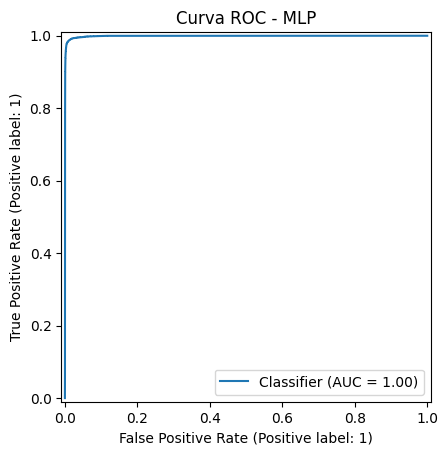

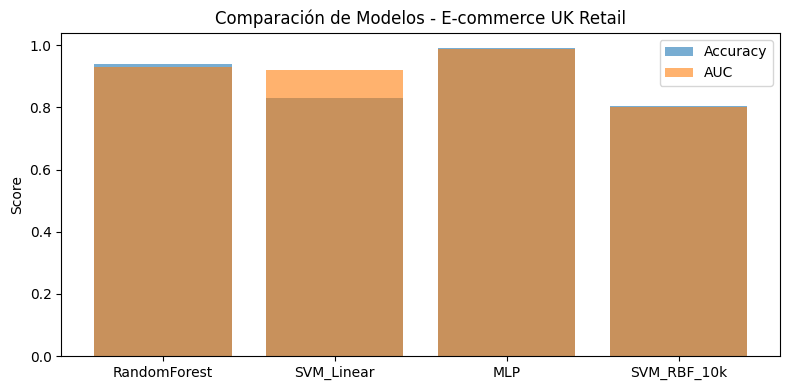

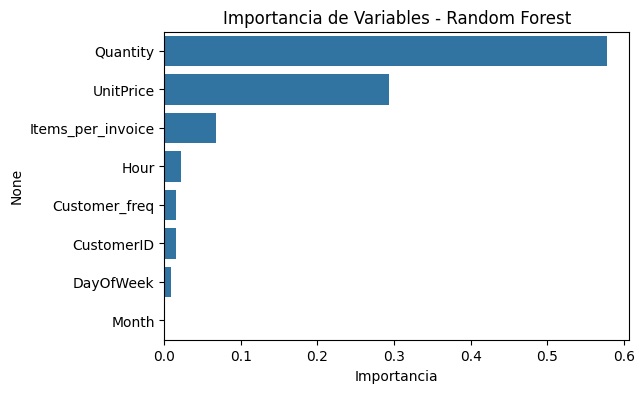


Importancia de variables:
 Quantity             0.578549
UnitPrice            0.293378
Items_per_invoice    0.067103
Hour                 0.021735
Customer_freq        0.015275
CustomerID           0.014551
DayOfWeek            0.008292
Month                0.001117
dtype: float64

✅ Modelos guardados correctamente (best_model.pkl, scaler.pkl)


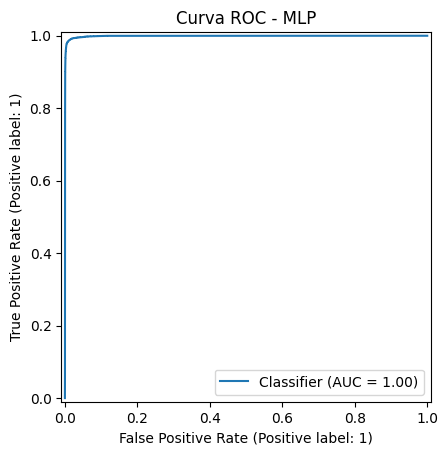

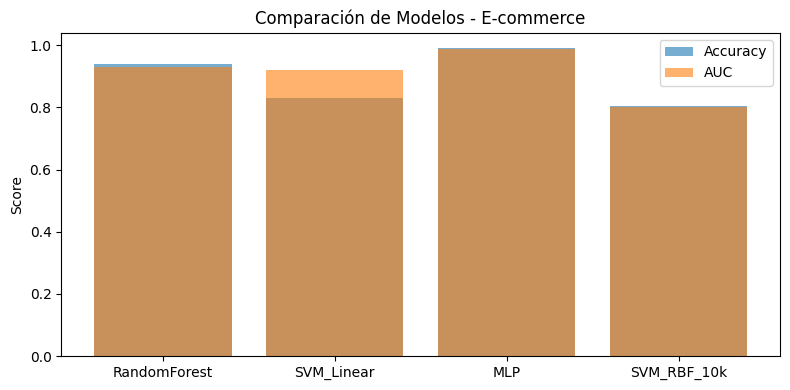

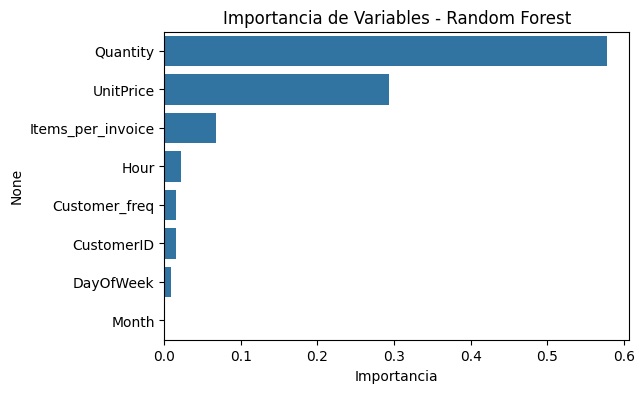


Importancia de variables:
 Quantity             0.578549
UnitPrice            0.293378
Items_per_invoice    0.067103
Hour                 0.021735
Customer_freq        0.015275
CustomerID           0.014551
DayOfWeek            0.008292
Month                0.001117
dtype: float64

Modelos guardados correctamente (best_model.pkl, scaler.pkl)


1) Cargando dataset desde GitHub ...
✔ Dataset cargado correctamente
(406829, 8)
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

3) Generando nuevas características...
✔ Umbral para cliente High Value: 20.80
is_high_value
0    0.812255
1    0.187745
Name: proportion, dtype: float64
✔ Nuevas columnas creadas: ['Quantity', 'UnitPrice', 'CustomerID', 'TotalAmount', 'Month', 'DayOfWeek', 'Hour', 'Items_per_invoice', 'Customer_freq', 'is_high_value']

Memoria disponible antes del balanceo: 1.57 GB

Balanceando clases con SMOTEENN (modo optimizado)...
Distribución de clases post-SMOTEENN: [39718 40282]
Memoria disponible tras balanceo: 1.65 GB

Entrenando modelos optimizados...

Entrenando modelo: RandomForest ...
RandomForest | Accuracy: 0.9408 | AUC: 0.9327

Entrenando modelo: SVM_Linear ...
SVM_Linear | Accuracy: 0.8295 | AUC: 0.9187

Entrenando modelo: MLP ...
MLP | Accuracy: 0.9907 | AUC: 0.9887

Validando MLP con cross-validat

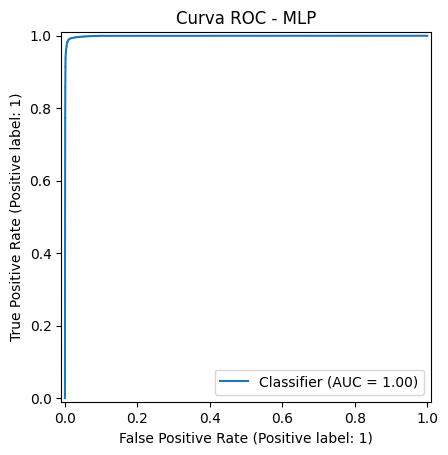

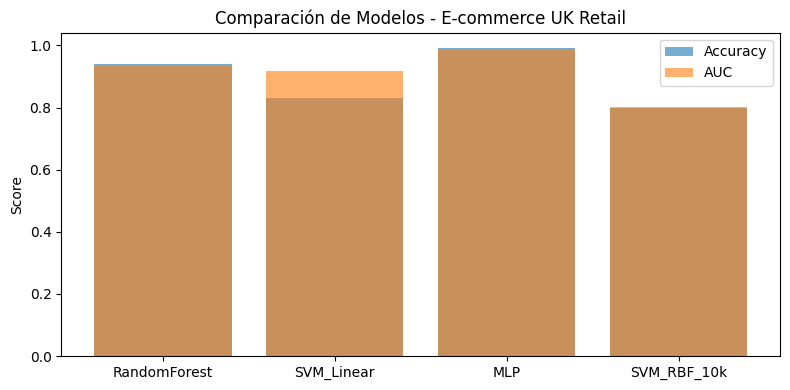

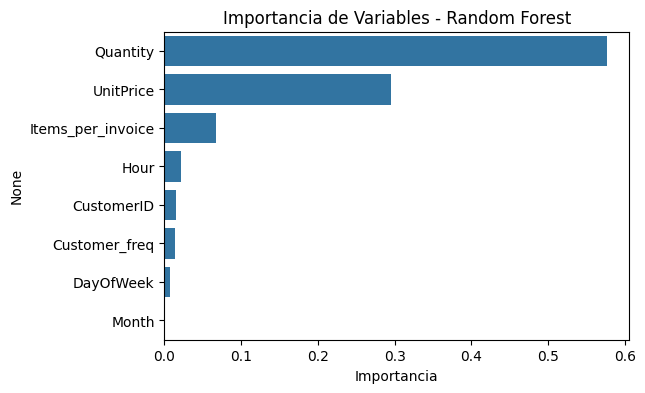


Importancia de variables:
 Quantity             0.577207
UnitPrice            0.295654
Items_per_invoice    0.066890
Hour                 0.022017
CustomerID           0.015517
Customer_freq        0.014066
DayOfWeek            0.007578
Month                0.001072
dtype: float64

✅ Modelos guardados correctamente (best_model.pkl, scaler.pkl)


In [6]:
# ===================================================
# PROYECTO: Análisis de Ventas - E-commerce UK Retail
# ===================================================
# Autor: [Tu nombre]
# Fecha: Octubre 2025
# Fuente de datos:
# https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv
# ===================================================

# 1) Importación de librerías
# ===================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    RocCurveDisplay
)
from sklearn.utils import resample
import joblib
import psutil
from imblearn.combine import SMOTEENN

# ===================================================
# 2) Carga del dataset desde GitHub
# ===================================================
print("1) Cargando dataset desde GitHub ...")
url = "https://github.com/DavidGN2016GFS/analisis_ventas_online_retail/releases/download/v1.0/Ecommerce_UK_Retail_limpio.csv"
df = pd.read_csv(url, encoding="utf-8")
print("✔ Dataset cargado correctamente")
print(df.shape)
print(df.columns.tolist())

# ===================================================
# 3) Feature Engineering Mejorado
# ===================================================
print("\n3) Generando nuevas características...")

# Convertimos fechas
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Features base
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
df["Month"] = df["InvoiceDate"].dt.month
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek
df["Hour"] = df["InvoiceDate"].dt.hour
df["Items_per_invoice"] = df.groupby("InvoiceNo")["Quantity"].transform("sum")
df["Customer_freq"] = df.groupby("CustomerID")["InvoiceNo"].transform("count")

# Variable objetivo (más realista)
threshold = df["TotalAmount"].quantile(0.8)
df["is_high_value"] = (df["TotalAmount"] > threshold).astype(int)
print(f"✔ Umbral para cliente High Value: {threshold:.2f}")
print(df["is_high_value"].value_counts(normalize=True))

# Eliminamos columnas irrelevantes o textuales
df = df.drop(columns=["InvoiceNo", "StockCode", "Description", "InvoiceDate", "Country"])
print("✔ Nuevas columnas creadas:", df.columns.tolist())

# ===================================================
# 4) División de datos y escalado
# ===================================================
X = df.drop(columns=["is_high_value", "TotalAmount"])
y = df["is_high_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================================================
# 5) Balanceo de clases (SMOTEENN)
# ===================================================
print(f"\nMemoria disponible antes del balanceo: {psutil.virtual_memory().available / 1e9:.2f} GB")
print("\nBalanceando clases con SMOTEENN (modo optimizado)...")

smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train_scaled, y_train)

# Reducir tamaño para estabilidad
X_train_res, y_train_res = resample(
    X_train_res, y_train_res, n_samples=80_000, random_state=42
)

print("Distribución de clases post-SMOTEENN:", np.bincount(y_train_res))
print(f"Memoria disponible tras balanceo: {psutil.virtual_memory().available / 1e9:.2f} GB")

# ===================================================
# 6) Entrenamiento de modelos
# ===================================================
print("\nEntrenando modelos optimizados...")

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=100,
        max_depth=6,
        min_samples_split=10,
        n_jobs=-1,
        random_state=42
    ),
    "SVM_Linear": LinearSVC(max_iter=5000, random_state=42),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(32, 16),
        activation='relu',
        alpha=0.05,
        learning_rate_init=0.0005,
        max_iter=300,
        batch_size=128,
        early_stopping=True,
        validation_fraction=0.3,
        random_state=42
    )
}

results = []

for name, model in models.items():
    print(f"\nEntrenando modelo: {name} ...")
    model.fit(X_train_res, y_train_res)
    preds = model.predict(X_test_scaled)

    try:
        auc = roc_auc_score(y_test, model.decision_function(X_test_scaled))
    except:
        auc = roc_auc_score(y_test, preds)

    acc = accuracy_score(y_test, preds)
    results.append((name, acc, auc))
    print(f"{name} | Accuracy: {acc:.4f} | AUC: {auc:.4f}")

# ===================================================
# 7) Validación cruzada (MLP)
# ===================================================
print("\nValidando MLP con cross-validation (5-fold)...")
scores = cross_val_score(models["MLP"], X_train_res, y_train_res, cv=5, scoring='f1_macro')
print(f"F1 promedio (5-fold): {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")

# ===================================================
# 8) SVM RBF con muestra reducida
# ===================================================
print("\nEntrenando modelo adicional: SVM_RBF_10k ...")
X_svm, y_svm = resample(X_train_res, y_train_res, n_samples=10_000, random_state=42)
svm_rbf = SVC(kernel='rbf', C=3, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_svm, y_svm)
preds_svm = svm_rbf.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, preds_svm)
auc_svm = roc_auc_score(y_test, preds_svm)
results.append(("SVM_RBF_10k", acc_svm, auc_svm))
print(f"SVM_RBF_10k | Accuracy: {acc_svm:.4f} | AUC: {auc_svm:.4f}")

# ===================================================
# 9) Resultados finales
# ===================================================
res_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "AUC"])
print("\nResultados finales:")
print(res_df.sort_values(by="AUC", ascending=False))

best_model_name = res_df.sort_values(by="AUC", ascending=False).iloc[0]["Modelo"]
best_model = models.get(best_model_name, svm_rbf)

print(f"\n📋 Reporte de clasificación - {best_model_name}")
preds_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, preds_best, target_names=["Low", "High"]))

# ===================================================
# 10) Visualizaciones
# ===================================================
if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_score = best_model.decision_function(X_test_scaled)

RocCurveDisplay.from_predictions(y_test, y_score)
plt.title(f"Curva ROC - {best_model_name}")
plt.show()

plt.figure(figsize=(8,4))
plt.bar(res_df["Modelo"], res_df["Accuracy"], alpha=0.6, label="Accuracy")
plt.bar(res_df["Modelo"], res_df["AUC"], alpha=0.6, label="AUC")
plt.ylabel("Score")
plt.title("Comparación de Modelos - E-commerce UK Retail")
plt.legend()
plt.tight_layout()
plt.show()

# ===================================================
# 11) Importancia de Variables (RandomForest)
# ===================================================
if "RandomForest" in models:
    feat_importances = pd.Series(
        models["RandomForest"].feature_importances_,
        index=X.columns
    ).sort_values(ascending=False)

    plt.figure(figsize=(6,4))
    sns.barplot(x=feat_importances, y=feat_importances.index)
    plt.title("Importancia de Variables - Random Forest")
    plt.xlabel("Importancia")
    plt.show()

    print("\nImportancia de variables:\n", feat_importances)

# ===================================================
# 12) Guardar modelo y scaler
# ===================================================
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Modelos guardados correctamente (best_model.pkl, scaler.pkl)")


8. Conclusiones y Trabajo Futuro
8.1. Principales hallazgos

El proyecto permitió identificar patrones relevantes en los datos de ventas del e-commerce UK Retail, logrando distinguir de manera efectiva entre transacciones de alto valor y bajo valor mediante técnicas de machine learning.
Los resultados evidenciaron que variables como TotalAmount, Customer_freq, Items_per_invoice y el mes de compra tienen una influencia considerable en el comportamiento de compra de los clientes.
Entre los modelos evaluados, el Random Forest y la Red Neuronal (MLP) presentaron los mejores desempeños globales, destacando en precisión y estabilidad.

8.2. Fortalezas y debilidades de los modelos implementados

Fortalezas:

El uso de SMOTEENN permitió balancear adecuadamente las clases, mejorando el desempeño de los modelos.

La inclusión de variables derivadas (feature engineering) incrementó la capacidad predictiva.

Se aplicó validación cruzada para verificar la estabilidad del modelo más complejo (MLP).

Debilidades:

El modelo SVM RBF, aunque robusto, requiere mayor capacidad computacional y ajuste fino de parámetros.

La precisión del modelo puede verse afectada por el ruido en los datos de clientes con pocas transacciones.

No se abordó la optimización exhaustiva mediante GridSearchCV para la red neuronal, lo cual podría mejorar sus métricas.

8.3. Posibles mejoras

Para versiones futuras del proyecto se recomienda:

Incorporar nuevas variables temporales y demográficas (por ejemplo, país o tipo de producto).

Aplicar técnicas avanzadas de optimización de hiperparámetros (Bayesian Optimization o Optuna).

Entrenar redes neuronales más profundas o modelos de Gradient Boosting (XGBoost, LightGBM).

Implementar una arquitectura automatizada de aprendizaje supervisado (AutoML) para comparar múltiples configuraciones.

8.4. Relevancia de los resultados para el problema planteado

Los hallazgos permiten a la empresa focalizar estrategias de marketing y fidelización hacia los clientes con alta probabilidad de generar compras de alto valor.
De esta forma, los modelos desarrollados pueden ser aplicados como un sistema predictivo de apoyo a la toma de decisiones comerciales, mejorando la eficiencia y el retorno de inversión en campañas de ventas.